In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sn


In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
train_data.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [8]:
train_data.shape

(31647, 18)

In [9]:
train_data.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [41]:
train_data.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [10]:
train_data['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

In [11]:
train_data['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

In [12]:
train_data['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

<AxesSubplot:>

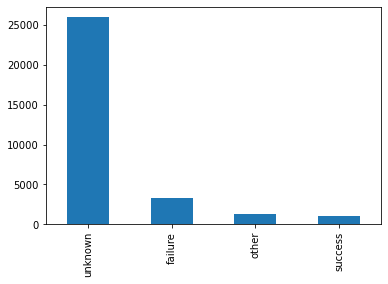

In [53]:
train_data['poutcome'].value_counts().plot.bar()

In [14]:
train_data['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [46]:
train_data['subscribed'].value_counts(normalize = True)

0    0.882611
1    0.117389
Name: subscribed, dtype: float64

In [15]:
train_data['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

<AxesSubplot:>

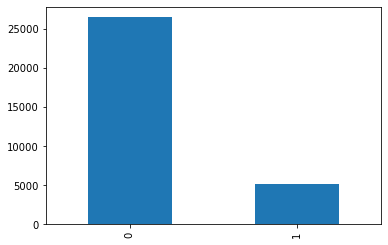

In [69]:
train_data['loan'].value_counts().plot.bar()

In [16]:
train_data['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [17]:
train_data['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<AxesSubplot:>

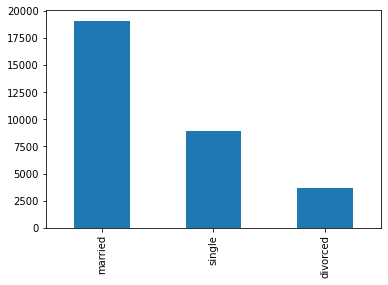

In [56]:
train_data['marital'].value_counts().plot.bar()

In [18]:
train_data['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:>

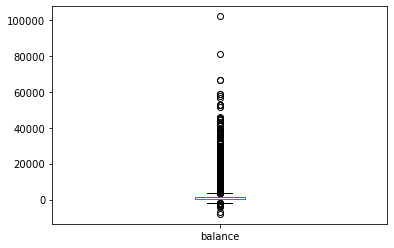

In [42]:
train_data['balance'].plot.box()

<AxesSubplot:ylabel='Frequency'>

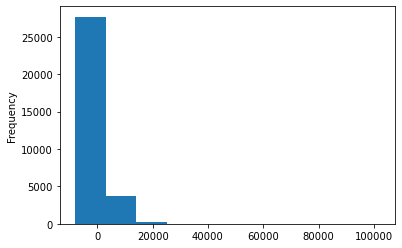

In [43]:
train_data['balance'].plot.hist()

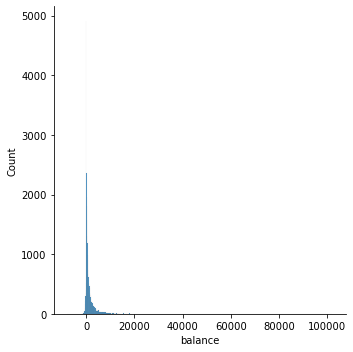

In [54]:
sn.displot(train_data['balance'])

<AxesSubplot:>

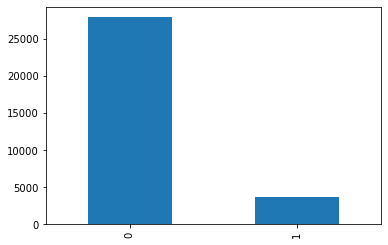

In [48]:
train_data['subscribed'].value_counts().plot.bar()

<AxesSubplot:ylabel='Frequency'>

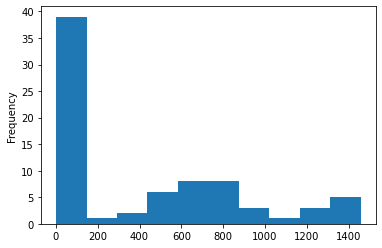

In [49]:
train_data['age'].value_counts().plot.hist()

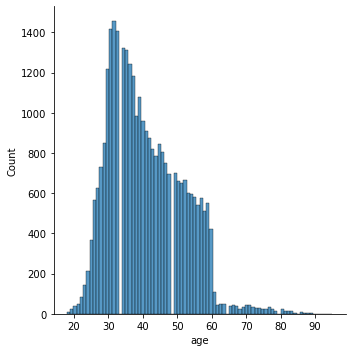

In [51]:
sn.displot(train_data['age'])

<AxesSubplot:>

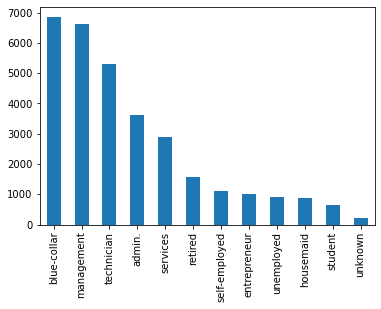

In [52]:
train_data['job'].value_counts().plot.bar()

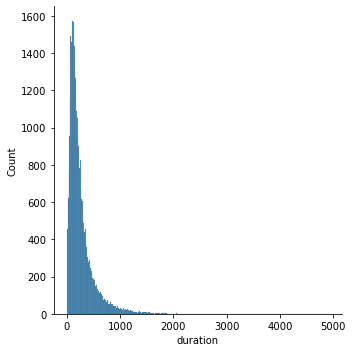

In [55]:
sn.displot(train_data['duration'])

In [20]:
train_data.replace({'yes':1,'no':0}, inplace = True)

In [21]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0


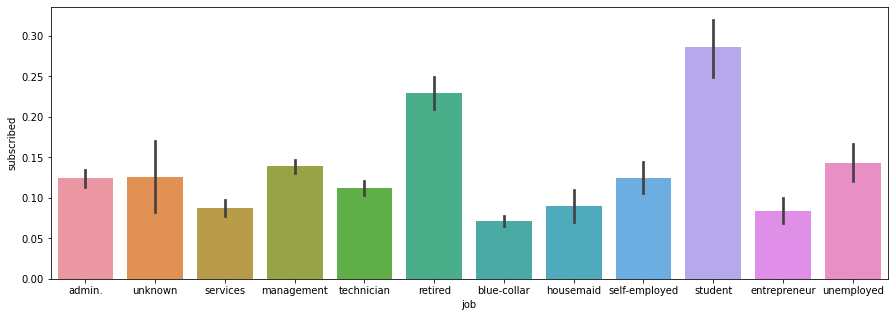

In [39]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'job', y = 'subscribed', data = train_data)
plt.show()

In [72]:
job = pd.crosstab(train_data['job'],train_data['subscribed'])
print(job)

subscribed        0    1
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


<AxesSubplot:xlabel='job'>

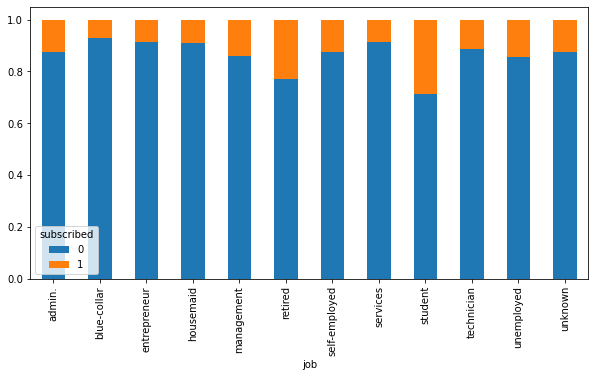

In [75]:
job.div(job.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,5))

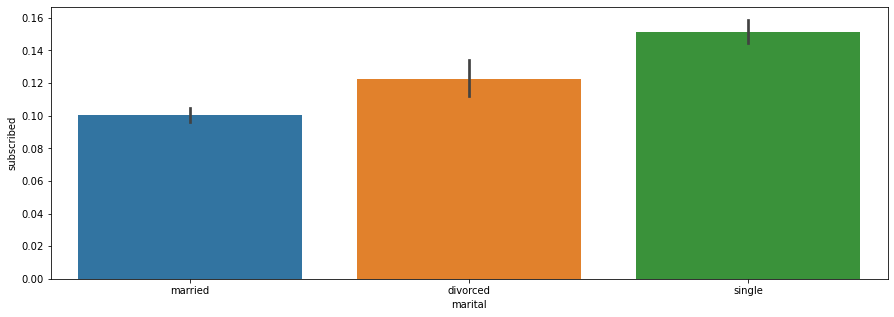

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'marital', y = 'subscribed', data = train_data)
plt.show()

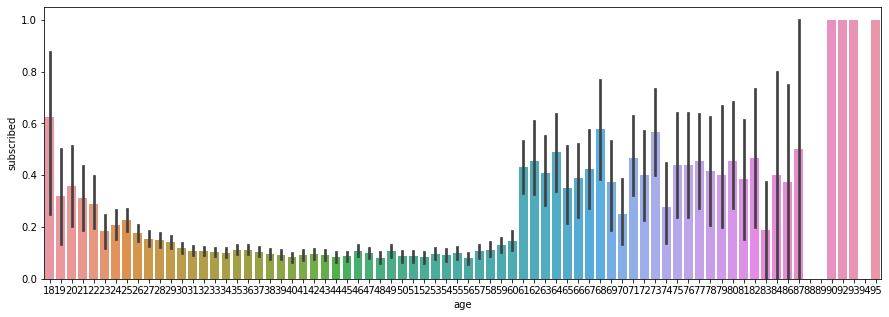

In [65]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'age', y = 'subscribed', data = train_data)
plt.show()

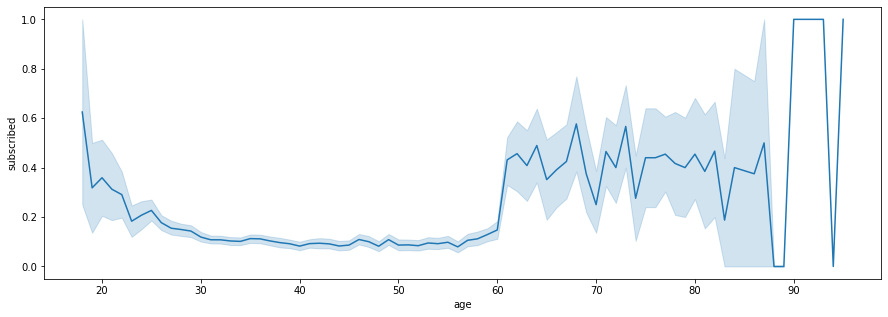

In [66]:
plt.figure(figsize=(15,5))
sns.lineplot(x = 'age', y = 'subscribed', data = train_data)
plt.show()

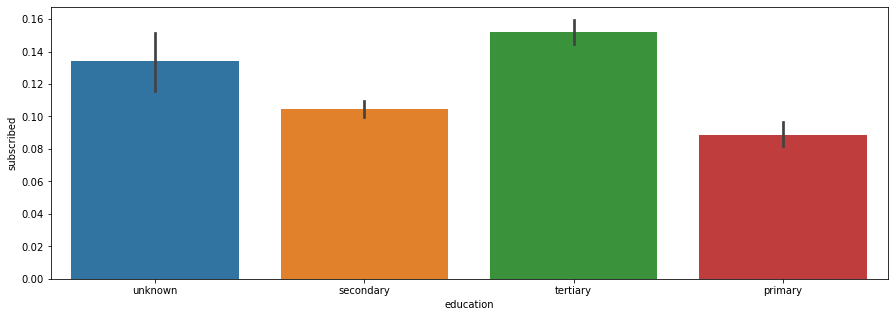

In [67]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'education', y = 'subscribed', data = train_data)
plt.show()

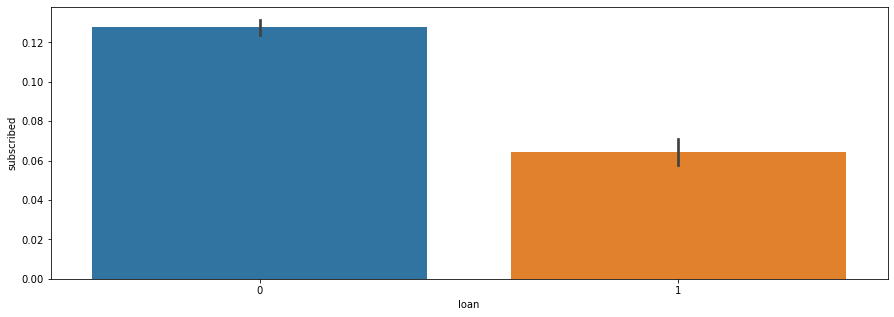

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'loan', y = 'subscribed', data = train_data)
plt.show()

In [70]:
train_data.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0


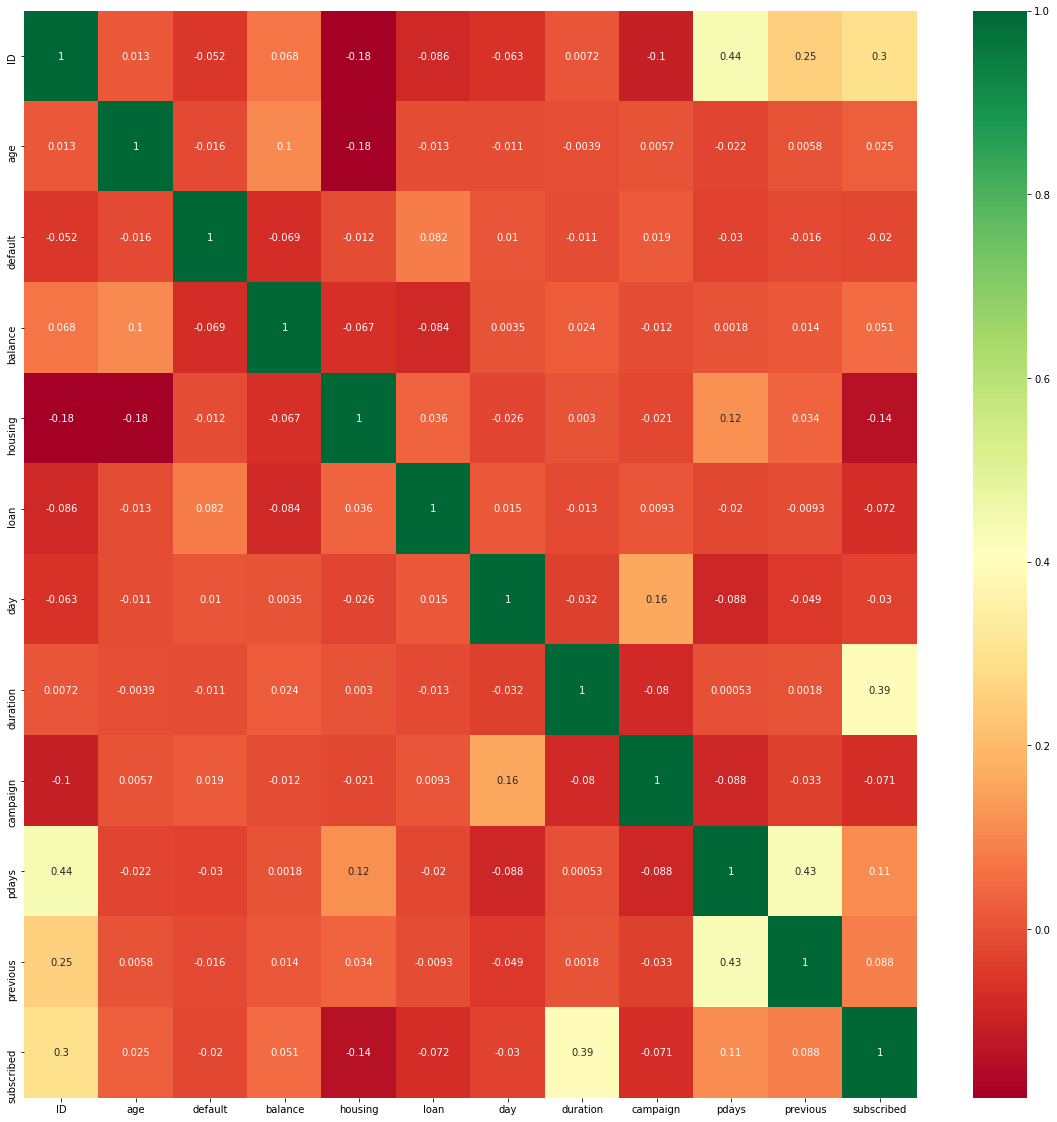

In [76]:
plt.figure(figsize = (20,20))
sns.heatmap(train_data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [77]:
train_data.describe()

,ID,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,0.018485,1363.890258,0.555629,0.162132,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389
std,13075.936990,10.625134,0.134700,3028.304293,0.496904,0.368578,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888
min,2.000000,18.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11218.000000,33.000000,0.000000,73.000000,0.000000,0.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22519.000000,39.000000,0.000000,450.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33879.500000,48.000000,0.000000,1431.000000,1.000000,0.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,45211.000000,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [80]:
target = train_data['subscribed']
train = train_data.drop('subscribed',1)

In [81]:
target.head()

0    0
1    0
2    0
3    1
4    0
Name: subscribed, dtype: int64

In [82]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown


In [83]:
train = pd.get_dummies(train)

In [84]:
train.head()

,ID,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,0,1933,0,0,19,44,2,-1,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,0,3,0,0,20,91,2,-1,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,0,891,1,0,18,240,1,-1,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,0,3287,0,0,22,867,1,84,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,0,119,1,0,4,380,1,-1,...,0,0,0,0,0,0,0,0,0,1


In [85]:
train.columns

Index(['ID', 'age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(train,target, test_size = 0.2, random_state = 12)

In [92]:
from sklearn.linear_model import LogisticRegression

In [95]:
import warnings
warnings.filterwarnings("ignore")

In [93]:
lreg = LogisticRegression()

In [96]:
lreg.fit(X_train, y_train)

LogisticRegression()

In [97]:
predication = lreg.predict(X_test)

In [98]:
from sklearn.metrics import accuracy_score

In [100]:
accuracy_score(y_test,predication)

0.8876777251184834

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [105]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [106]:
predict = clf.predict(X_test)

In [107]:
accuracy_score(y_test,predict)

0.9042654028436019

In [113]:
test.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,38441,32,118,15,20,6,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,40403,78,2787,1,372,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3709,31,144,16,676,1,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,37422,57,3777,13,65,2,-1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,12527,45,-705,3,111,1,-1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [115]:
test.columns

Index(['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')